# Promena palete scene
Paleta boja može predstavljati sve boje koje se pronalaze na slici ili određeni skup boja koje se nalaze u najvećem broju. Najčešće paletu boja predstavlja šest nijansi. Ako želimo da dve slike izgledaju skladno, npr. kao što prepoznajemo umetnike po stilu, možemo ih modifikovati tako da imaju istu paletu boja.

## Učitavanje i obrada resursa
Prvo ćemo učitati potrebne biblioteke za rad. Koristimo biblioteku matplotlib.pyplot za grafički prikaz podataka i slika, nupmy za rad s nizovima, i opencv za rad sa slikama.

Potom ćemo učitati dve slike, jednu koju ćemo koristiti kao referentnu i drugu na kojoj ćemo da menjamo boju prema referentnoj slici. Python učitava slike u boji kao trodimenzionalne matrice, pri čemu su dve dimenzije dimenzije same slike (broj piksela po dužini i širini) a treća dimenzija najčešće 3 (svaki piksel je predstavljen nizom od tri vrednosti, vrednosti crvene, zelene i plave boje u tom pikselu, ukoliko se slika predstavlja RGB sistemom). Obično se koristi RGB sistem, međutim python ih najčešće učitava u BGR sistemu, pa ih konvertujemo, pomoću ugrađene funkcije iz biblioteke opencv, u RGB.

Text(0.5, 1.0, 'Slika u jednoj boji BLUE')

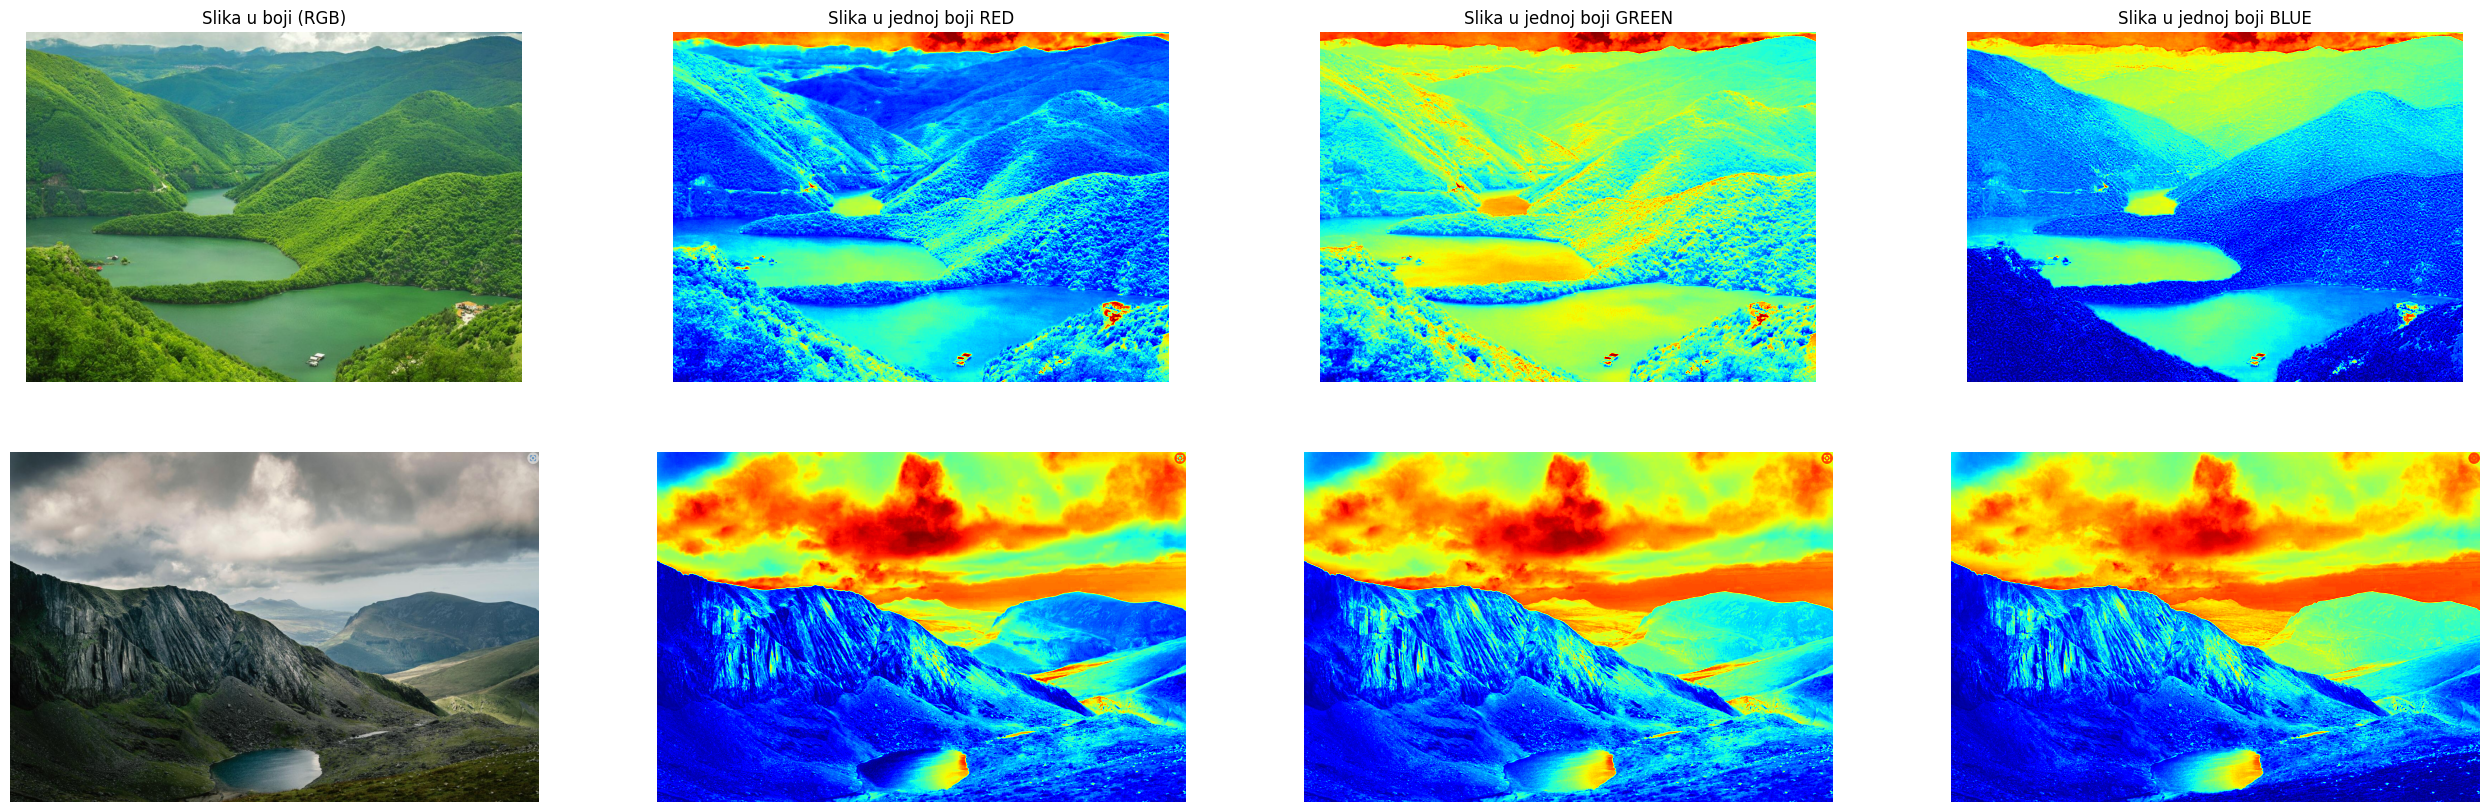

In [11]:
# Prvo učitavam potrebne biblioteke

import matplotlib.pyplot as plt
import numpy as np
import cv2

# Učitavam slike na kojima ću vršiti obradu
# Referentna slika je slika s koje ćemo uzimati uzorke palete boja
# Originalna slika je slika koju ćemo menjati

ref_slika = cv2.imread('Slike/dolina.png')
orig_slika = cv2.imread('Slike/mountains.png')

# Konvertovanje iz BGR u RGB

ref_slika = cv2.cvtColor(ref_slika,cv2.COLOR_BGR2RGB)
orig_slika = cv2.cvtColor(orig_slika,cv2.COLOR_BGR2RGB)


# Izdvajanje crvene/zelene/plave boje referentne slike u odvojenu matricu

ref_r = ref_slika[:,:,0] # ref_slika je trodimenzionalna matrica, te u ref_r kopiramo za svaki piksel vrednost RED kanala iz ref slike(ref_r je sada dvodim. matrica)
ref_g = ref_slika[:,:,1]
ref_b = ref_slika[:,:,2]


# Izdvajanje crvene/zelene/plave boje originalne slike u odvojenu matricu

orig_r = orig_slika[:,:,0]
orig_g = orig_slika[:,:,1]
orig_b = orig_slika[:,:,2]


# Prikazujemo rezultate deljenja na kanale

fig, ax = plt.subplots(2,4,figsize=(32,10))

ax[0,0].imshow(ref_slika)
ax[0,0].axis('off')
ax[0,1].imshow(ref_r,cmap='jet')
ax[0,1].axis('off')
ax[0,2].imshow(ref_g,cmap='jet')
ax[0,2].axis('off')
ax[0,3].imshow(ref_b,cmap='jet')
ax[0,3].axis('off')

ax[1,0].imshow(orig_slika)
ax[1,0].axis('off')
ax[1,1].imshow(fin_r,cmap='jet')
ax[1,1].axis('off')
ax[1,2].imshow(fin_g,cmap='jet')
ax[1,2].axis('off')
ax[1,3].imshow(fin_b,cmap='jet')
ax[1,3].axis('off')

ax[0,0].set_title('Slika u boji (RGB)')
ax[0,1].set_title('Slika u jednoj boji RED')
ax[0,2].set_title('Slika u jednoj boji GREEN')
ax[0,3].set_title('Slika u jednoj boji BLUE')

## Histogrami
Histogram je grafički prikaz zastupljenosti podatka u nekom datasetu. Za svaku ulaznu vrednost se prikazuje njen broj ili frekvencija pojavljivanja u ukupnom skupu vrednosti. U našim slikama (matricama) su zastupljene vrednosti piksela od 0 do 255. U svakoj slici (matrici) se nalaze pikseli čije su vrednosti iz tog opsega a te vrednosti se ponavljaju. Koristićemo histograme da prikažemo zastupljenosti tih vrednosti u slici: za svaku vrednost njen broj pojavljivanja - za svaku vrednost koju piksel može da ima broj piksela koji imaju tu vrednost.

In [13]:
# kreiram 3 prazna niza duzine 256 za pamcenje normalizovanog histograma za 3 kanala referentne slike

hist_ref_r = np.zeros(256)
hist_ref_g = np.zeros(256)
hist_ref_b = np.zeros(256)

# kreiram i 3 prazna niza duzine 256 za pamćenje normalizovanog histograma za 3 kanala originalne slike

hist_orig_r = np.zeros(256)
hist_orig_g = np.zeros(256)
hist_orig_b = np.zeros(256)

# uzimam dimenzije referentne slike - broj piksela po širini i dužini

refrows= ref_slika.shape[0]
refcols = ref_slika.shape[1]

# uzimam i dimenzije originalne slike

finrows = orig_slika.shape[0]
fincols = orig_slika.shape[1]


# for petlja prolazi kroz svaki piksel po redovima i kolonama referentne slike

for i in range(refrows):
    for j in range(refcols):
        hist_ref_r[ref_r[i][j]]+=1  # vrednost piksela u datom redu i koloni koristimo kao indeks
                                    # člana niza (histograma) na kojem povećavamo vrednost za 1 (broj pojavljivanja te vred.)
                                    # za svaku vrednost piksela iz matrice povećavamo broj ponavljanja te vrednosti na histogramu (u nizu na odgovarajućem indeksu)

for i in range(refrows):   # ponavljamo postupak za kanal zelene boje
    for j in range(refcols):
        hist_ref_g[ref_g[i][j]]+=1   
                                    
for i in range(refrows):   # ponavljamo postupak za kanal zelene boje
    for j in range(refcols):
        hist_ref_b[ref_b[i][j]]+=1
                                    

# ponavljamo postupak za originalnu sliku

for i in range(finrows):
    for j in range(fincols):
        hist_orig_r[orig_r[i][j]]+=1 # vrednost piksela u datom redu i koloni koristimo kao indeks 
                                    # člana niza (histograma) na kojem povećavamo vrednost za 1 (broj pojavljivanja te vred.)
                                    # za svaku vrednost piksela iz matrice povećavamo broj ponavljanja te vrednosti na histogramu (u nizu na odgovarajućem indeksu)

for i in range(finrows):   # ponavljamo postupak za kanal zelene boje
    for j in range(fincols):
        hist_orig_g[orig_g[i][j]]+=1   
                                    
for i in range(finrows):   # ponavljamo postupak za kanal zelene boje
    for j in range(fincols):
        hist_orig_b[orig_b[i][j]]+=1


Kumulativni histogram je histogram koji prikazuje kumulativnu distribuciju nekog podatka. Ne prikazuje frekvenciju ili broj pojavljivanja vrednosti u datasetu kao normalizovani histogram, već sumu broja pojavljivanja ili frekvencije te vrednosti i svake manje od nje. Dakle, za svaku vrednost prikazuje koliko piksela ima tu vrednost ili manju. Kumulativni histogram češće koristimo u obradi podataka, zbog toga što je monotono rastući: vrednosti funkcije nikada nisu iste za dve različite vrednosti, i stalno rastu. Takođe za poslednju vrednost iz dataseta kumlativna funkcija ima vrednost 1 (ukoliko prikazuje kumulativnu frekvenciju) ili ukupan broj podataka (kada prikazuje broj pojavljivanja vrednosti), jer npr. svi pikseli imaju vrednost 255 ili manju.

In [14]:
# kreiram 3 prazna niza duzine 256 za pamcenje normalizovanog histograma za 3 kanala originalne slike

cdf_ref_r = np.zeros(256)
cdf_ref_g = np.zeros(256)
cdf_ref_b = np.zeros(256)

# ponavljam postupak za originalnu sliku

cdf_orig_r = np.zeros(256)
cdf_orig_g = np.zeros(256)
cdf_orig_b = np.zeros(256)


# for petlja koja prolazi kroz cele dužine nizova histogram za sva 3 kanala referentne slike

cdf_ref_r[0]=hist_ref_r[0]
for i in range(1,256):
    cdf_ref_r[i]=cdf_ref_r[i-1]+hist_ref_r[i]

cdf_ref_g[0]=hist_ref_g[0]
for i in range(1,256):
    cdf_ref_g[i]=cdf_ref_g[i-1]+hist_ref_g[i]

cdf_ref_b[0]=hist_ref_b[0]
for i in range(1,256):
    cdf_ref_b[i]=cdf_ref_b[i-1]+hist_ref_b[i]

# ponavljamo postupak za originalnu sliku

cdf_orig_r[0]=hist_orig_r[0]
for i in range(1,256):
    cdf_orig_r[i]=cdf_orig_r[i-1]+hist_orig_r[i]

cdf_orig_g[0]=hist_orig_g[0]
for i in range(1,256):
    cdf_orig_g[i]=cdf_orig_g[i-1]+hist_orig_g[i]

cdf_orig_b[0]=hist_orig_b[0]
for i in range(1,256):
    cdf_orig_b[i]=cdf_orig_b[i-1]+hist_orig_b[i]


Prikazujemo dobijene histograme na "subplot" figuri sa 2 reda i 3 kolone. U prvom redu prikazujemo histograme sva 3 kanala referentne slike, a u drugom histograme originalne slike. Matrica ax1 će sadržati reference svakog od ovih podgrafika i nju ćemo koristiti da prikažemo normalizovane histograme. Pravimo i drugu matricu ax2 koja će takođe pokazivati na svaki od ovih podgrafika, međutim pomoću nje ćemo prikazivati kumulativne histograme takođe na svakom podgrafiku, međutim oni neće koristiti istu y osu kao i normalizovani histogrami. Ovo radimo jer kumulativni histogrami i normalizovani nemaju isti opseg vrednosti, zbog čega je nepregledno da ih prikazujemo na istim graficima koristeći zajedničku y osu. Desna y osa se odnosi na kumulativne a leva na normalizovane histograme.

Text(0, 0.5, 'Ciljna slika')

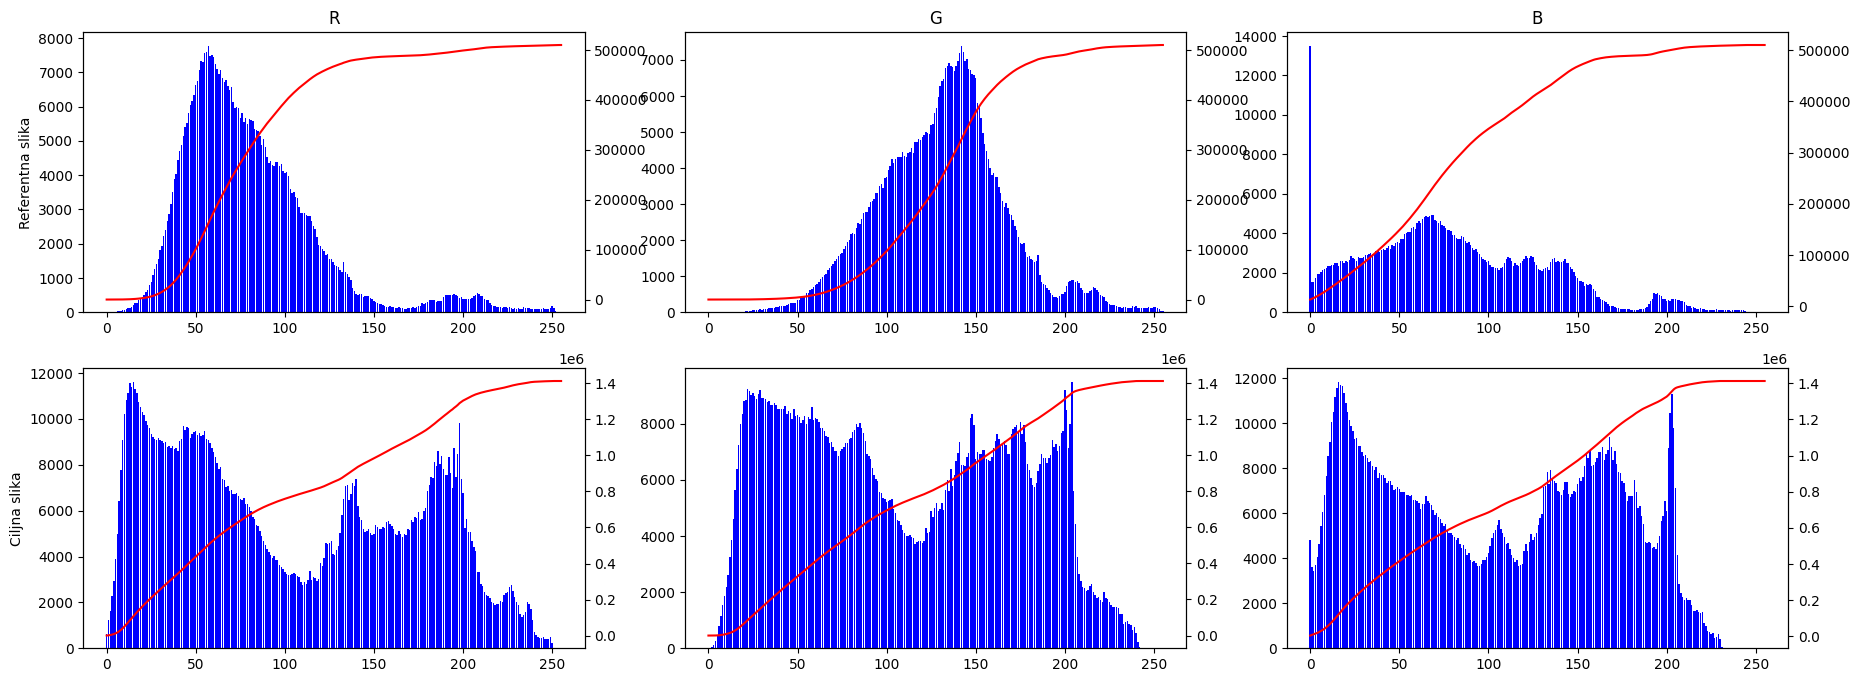

In [16]:
# PRIKAZ

# pravim niz duzine 256 s vrednostima od 0 do 255, za granice binova koje nam trebaju za grupisanje vrednosti pri prikazu

bins = np.arange(256)

# plotovanje

fig,ax1= plt.subplots(nrows=2,ncols=3,figsize=(22,8))

ax2 = np.array([[ax.twinx() for ax in red] for red in ax1])

ax1[0,0].bar(bins,hist_ref_r,color='b')
ax1[0,1].bar(bins,hist_ref_g,color='b')
ax1[0,2].bar(bins,hist_ref_b,color='b')
ax1[1,0].bar(bins,hist_orig_r,color='b')
ax1[1,1].bar(bins,hist_orig_g,color='b')
ax1[1,2].bar(bins,hist_orig_b,color='b')
ax2[0,0].plot(bins, cdf_ref_r, color='r')
ax2[0,1].plot(bins, cdf_ref_g, color='r')
ax2[0,2].plot(bins, cdf_ref_b, color='r')
ax2[1,0].plot(bins, cdf_orig_r, color='r')
ax2[1,1].plot(bins, cdf_orig_g, color='r')
ax2[1,2].plot(bins, cdf_orig_b, color='r')

ax1[0,0].set_title('R')
ax1[0,1].set_title('G')
ax1[0,2].set_title('B')
ax1[0,0].set_ylabel('Referentna slika')
ax1[1,0].set_ylabel('Ciljna slika')


## Normalizacija kumulativnih histograma
Kumulativni histogrami različitih slika se razlikuju u opsegu vrednosti u zavisnoti od dimenzija slika. Normalizovaćemo ih tako da budu u istom opsegu vrednosti - da poslednja vrednost kod svih histograma bude jednaka 1. Taj problem rešavamo normalizacijom - svaku vrednost iz nizova pomoću kojih pamtimo histograme ćemo podeliti sa dimenzijama slike na koju se odnose.

Text(0, 0.5, 'Ciljna slika')

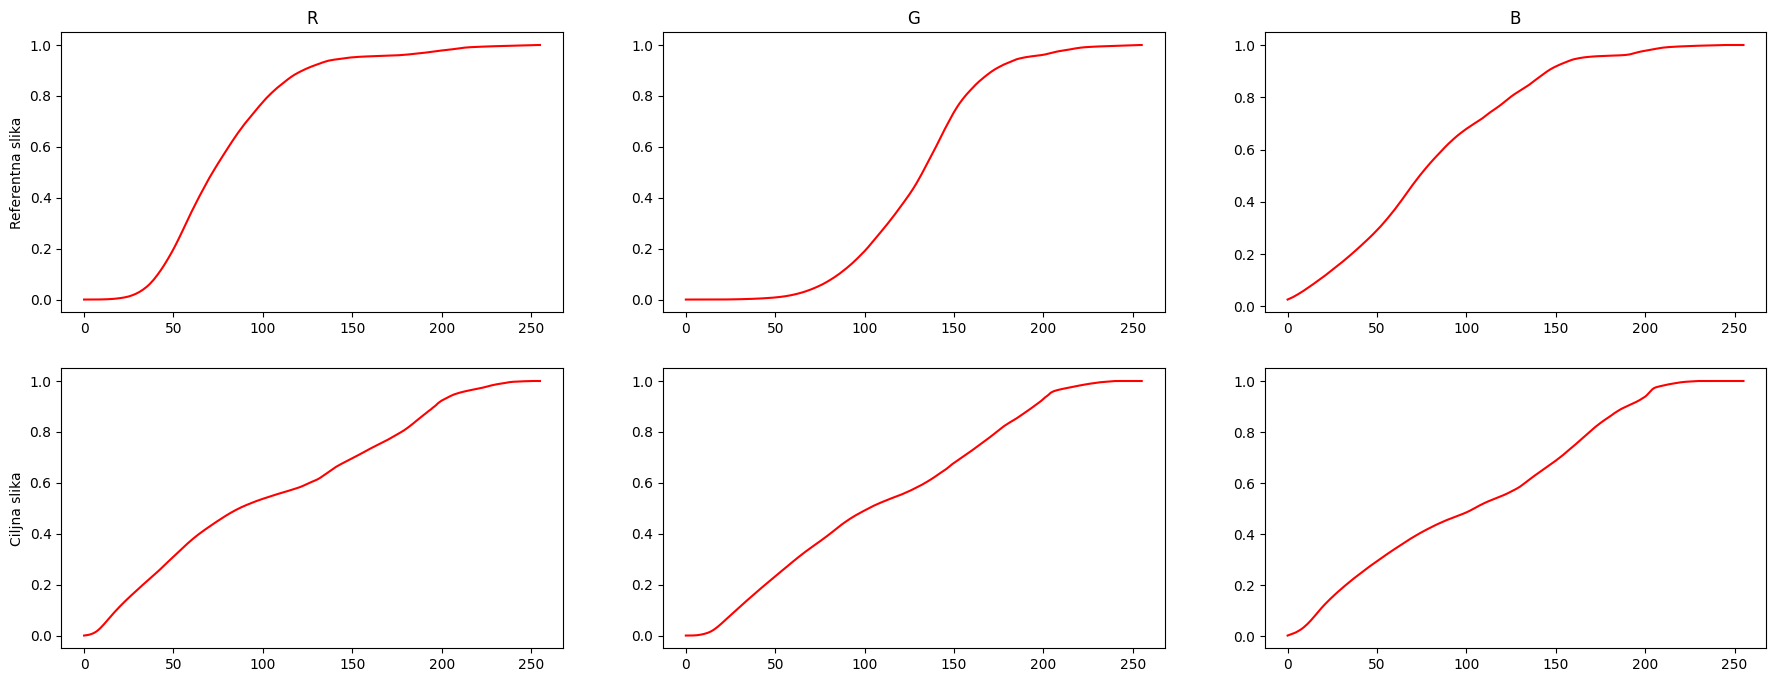

In [17]:
# Računamo dimenzija slika

ref_dim = ref_slika.shape[0]*ref_slika.shape[1]

orig_dim = orig_slika.shape[0]*orig_slika.shape[1]


# for petlja prolazi kroz sve elemente nizova i svaki podeli s dimenzijama odgovarajuće slike

for i in range(256):
    cdf_ref_r[i]=cdf_ref_r[i]/ref_dim

for i in range(256):
    cdf_ref_g[i]=cdf_ref_g[i]/ref_dim

for i in range(256):
    cdf_ref_b[i]=cdf_ref_b[i]/ref_dim

# ponavljamo postupak za originalnu sliku

for i in range(256):
    cdf_orig_r[i]=cdf_orig_r[i]/orig_dim

for i in range(256):
    cdf_orig_g[i]=cdf_orig_g[i]/orig_dim

for i in range(256):
    cdf_orig_b[i]=cdf_orig_b[i]/orig_dim


fig, ax = plt.subplots(2,3,figsize=(22,8))

ax[0,0].plot(cdf_ref_r,color='r')
ax[0,1].plot(cdf_ref_g,color='r')
ax[0,2].plot(cdf_ref_b,color='r')
ax[1,0].plot(cdf_orig_r,color='r')
ax[1,1].plot(cdf_orig_g,color='r')
ax[1,2].plot(cdf_orig_b,color='r')

ax[0,0].set_title('R')
ax[0,1].set_title('G')
ax[0,2].set_title('B')
ax[0,0].set_ylabel('Referentna slika')
ax[1,0].set_ylabel('Ciljna slika')

## Specifikacija kumulativnih histograma

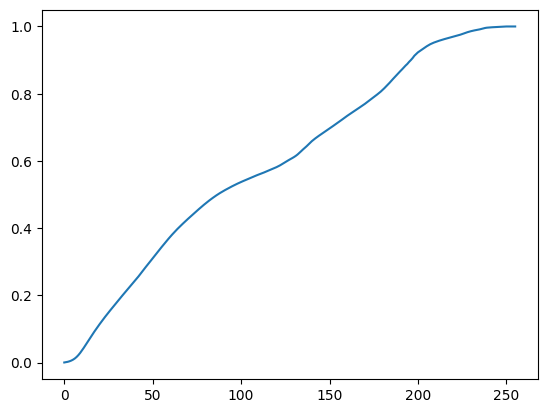

In [28]:
M = []

for i in range(256):
    t = cdf_ref_r[i]
    najblizi_index = np.abs(cdf_orig_r - t).argmin()
    M.append(najblizi_index)
    ##M[i]=n

plt.plot(cdf_orig_r)

In [29]:
fin = ref_r
s=0
for i in range (refrows):
    for j in range (refcols):
        if(fin[i][j]==M[s])
        s+=1

IndexError: list index out of range